# Visualizing the Explanations

### Setting the config file path

In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/home/coder/gretel'

In [2]:
from src.evaluation.evaluator_manager import EvaluatorManager

config_file_path = module_path + '/examples/config/config_tree-cycles_knn_obs.json'
output_file_path = module_path + '/output/knn_k-5_fit_on-tree-cycles_instances-80_nodes_per_inst-30_nodes_in_cycles-10/Oblivious_Bidirectional_Search/results_run-0.json'
output_folder = module_path + '/output/'
stats_folder = module_path + '/stats/'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

2023-02-09 14:55:58.640893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 14:55:58.830082: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


(True, True, True, True)

### Creating the Evaluator Manager

In [3]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

### Visualizing the results

Showing the json file with the output

In [4]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 80, "n_per_inst": 30, "n_in_cycles": 10}}, "oracle": {"name": "knn", "parameters": {"embedder": {"name": "graph2vec", "parameters": {}}, "k": 5}}, "explainer": {"name": "bidirectional_oblivious_search", "parameters": {"graph_distance": {"name": "graph_edit_distance", "parameters": {}}}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.0447850227355957, 0.012054681777954102, 0.03294539451599121, 0.012677669525146484, 0.08884692192077637, 0.018648147583007812, 0.024840354919433594, 0.05043530464172363, 0.020128965377807617, 0.013702154159545898, 0.024744272232055664, 0.03742504119873047, 0.012926340103149414, 0.03027176856994629, 0.01073765754699707, 0.0447540283203125, 0.043

Creating a table with the results

In [5]:
from src.data_analysis.data_analyzer import DataAnalyzer
import pandas as pd

dtan = DataAnalyzer(output_folder, stats_folder)
dtan.aggregate_data()
dtan.aggregate_runs()
dtan.create_tables_by_oracle_dataset()

results_table = pd.read_csv(stats_folder + 'tree-cycles-knn.csv')
results_table

,Unnamed: 0,explainer,runtime,runtime-std,Graph_Edit_Distance,Graph_Edit_Distance-std,Oracle_Calls,Oracle_Calls-std,Correctness,Correctness-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Oracle_Accuracy,Oracle_Accuracy-std
0,0,bidirectional_oblivious_search,0.07793,0.0,52.3375,0.0,13.35,0.0,1.0,0.0,0.876592,0.0,0.1,0.0,0.55,0.0


### Analizing a Counterfactual Explanation

In [6]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]
# Obtain the for each data instance its counterfactual explanation
inst_exp_list = ev.get_instance_explanation_pairs()
# Take the first pair instance-explanation as an example
inst, exp = inst_exp_list[2]

Showing the steps to get the counterfactual

In [10]:
# Printing the steps needed to obtain the counterfactual
cf_actions = dtan.get_counterfactual_actions(inst, exp)
for act, el in cf_actions.items():
    print(act, el)

Remove Nodes []
Remove Edges [(6, 15), (14, 16), (22, 23), (11, 2), (3, 19), (20, 29), (9, 14), (19, 12), (0, 11), (7, 1), (16, 22), (6, 17), (23, 24), (0, 7), (19, 8), (16, 18), (3, 5), (20, 21), (19, 10), (19, 16), (1, 4), (2, 6), (7, 5)]
Add Nodes []
Add Edges [(3, 4), (18, 20), (0, 2), (14, 25), (2, 8), (6, 11), (18, 19), (5, 6), (20, 22), (14, 18), (12, 18), (0, 1), (9, 16), (1, 5), (7, 9), (6, 10), (21, 23), (20, 24), (14, 17), (9, 12), (23, 29), (9, 15), (2, 3), (9, 18), (7, 8)]


Visualizing the changes in the counterfactual

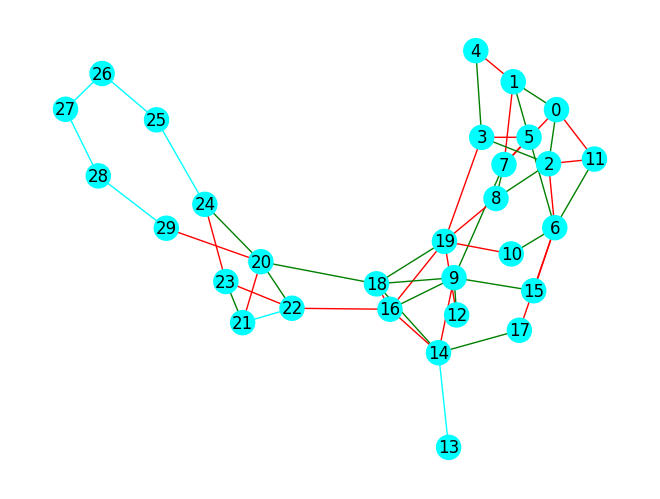

In [8]:
dtan.draw_counterfactual_actions(inst, exp, layout='spring')

The blue elements reamain unchanged between the original instance and the counterfactual, the red ones were removed in the conterfactual example, and the green ones were added.